## Importing required functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

## Loading Dataset

In [2]:
digits=load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
features=pd.DataFrame(digits.data,columns=digits.feature_names)

In [5]:
features.sample(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
514,0.0,0.0,5.0,13.0,15.0,6.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,7.0,14.0,16.0,11.0,1.0,0.0
433,0.0,0.0,0.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,15.0,11.0,2.0,0.0
1567,0.0,0.0,3.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,16.0,5.0,0.0,0.0,0.0
616,0.0,0.0,0.0,15.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,5.0,0.0,0.0,0.0
1338,0.0,0.0,10.0,16.0,14.0,6.0,0.0,0.0,0.0,0.0,...,6.0,1.0,0.0,0.0,12.0,16.0,14.0,13.0,16.0,8.0
1076,0.0,0.0,2.0,16.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,12.0,16.0,3.0,0.0,0.0
1179,0.0,2.0,10.0,14.0,16.0,12.0,0.0,0.0,0.0,10.0,...,10.0,0.0,0.0,1.0,16.0,13.0,9.0,3.0,0.0,0.0
1761,0.0,0.0,1.0,10.0,16.0,16.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0
375,0.0,0.0,0.0,5.0,13.0,16.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,10.0,0.0,0.0,0.0
330,0.0,0.0,5.0,8.0,12.0,16.0,4.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,7.0,13.0,7.0,0.0,0.0,0.0


In [6]:
labels=digits.target

In [7]:
labels[0:100:10]

array([0, 0, 0, 0, 8, 2, 3, 1, 1, 1])

## Function to plot images

In [8]:
def plot(index):
    temp=features.to_numpy()
    y=labels[index]
    x=temp[index]
    x=x.reshape(8,8)
    plt.imshow(x,cmap='gray')
    plt.title("Label is {}".format(y))
    plt.show()

In [9]:
features.shape

(1797, 64)

## Generating 10 random images

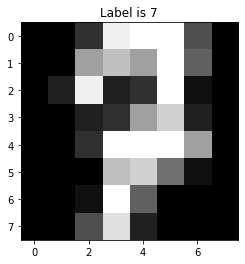

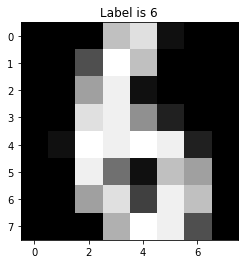

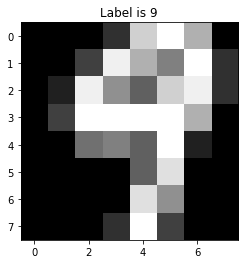

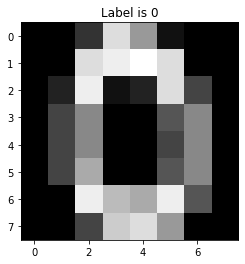

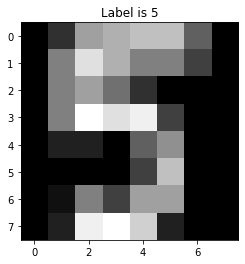

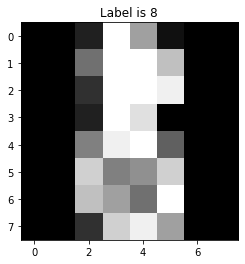

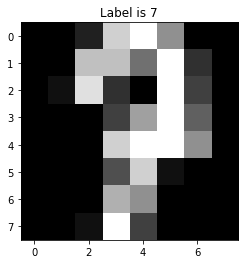

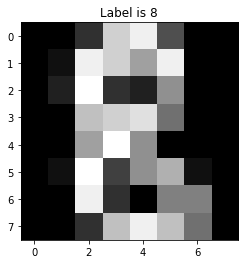

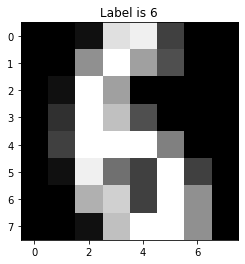

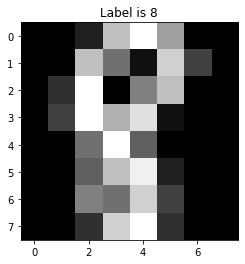

In [10]:
for i in range(10):
    index=np.random.randint(0,1797)
    plot(index)

## Train Test Split

In [11]:
train_x,test_x,train_y,test_y=train_test_split(features,labels,test_size=0.2)
train_x.shape,test_x.shape

((1437, 64), (360, 64))

## Creating Pipeline and Fitting Data

In [12]:
pipe=Pipeline([
    ('Scaler',StandardScaler()),
    ('model',LogisticRegression())
])


In [13]:
pipe.fit(train_x,train_y)

Pipeline(steps=[('Scaler', StandardScaler()), ('model', LogisticRegression())])

## Accuracy and Metrices

In [14]:
pipe.score(test_x,test_y)

0.9916666666666667

In [15]:
predicted=pipe.predict(test_x)

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        34
           3       0.96      1.00      0.98        25
           4       1.00      1.00      1.00        43
           5       0.97      0.97      0.97        36
           6       1.00      0.98      0.99        47
           7       1.00      1.00      1.00        38
           8       1.00      0.97      0.99        38
           9       1.00      1.00      1.00        30

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix: 



<AxesSubplot:>

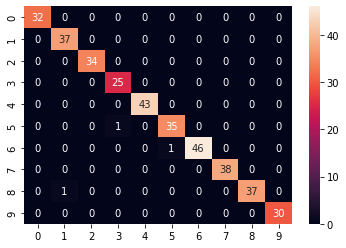

In [16]:
print("Classification Report: \n")
report=classification_report(predicted,test_y)
print(report)

print("Confusion Matrix: \n")
cm=confusion_matrix(predicted,test_y)
sns.heatmap(cm,annot=True)